# FIT1043 Week 6 Extra Activity

An alternative activity to explain the model fit, using regression of various polynomial and to show how it impacts the test.

This activity is to illustrate the impact of bias (to the train set) and the variance (to the test set).  There is a trade off between the two and there will be a point where this trade off is the best you can get from the model (at the end of this, this point is the regression of polynomial 12, but this will differ from model to model).


We start with importing our standard libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

## Generate data 

The codes below generate a section of the sinusodial graph with some noise introduced.  Note that, this is to simulate some data (that may be similar to an actual collected data).  This step is not part of a data science process as you will obtain actual data.

In [62]:
# We set the seed to be able to obtain the same pseudo random data points.
np.random.seed(10)
x = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(x) + np.random.normal(0,0.15,len(x))

Let's visualise the data points that we have generated

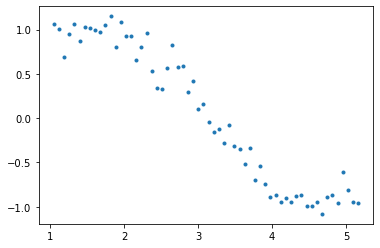

In [63]:
plt.plot(x,y,'.')

## Linear Regression (using Seaborn library)

Here, we introduce yet another library that has the capability to plot a linear regression.  The documentation for it can be found https://seaborn.pydata.org/generated/seaborn.regplot.html.

We firstly import the seaborn library.

In [64]:
import seaborn as sn

### Function to generate 'fit' (the model) to the given data

The function below generates a 'fit' based on the 'degree' parameter.
- Degree 1: Linear (Straight Line)
- Degree 2: Quadratic 
- Degree 3: Cubic 
- etc

The bigger the degree the "curvier" the line. For more information about degree of a polynomial, please refer to https://en.wikipedia.org/wiki/Degree_of_a_polynomial

In [65]:
# Create a DataFrame from the x, y points so that we can create a new column for the "fit" y-value.
curve = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
curve.head()

,x,y
0,1.047198,1.065763
1,1.117011,1.006086
2,1.186824,0.695374
3,1.256637,0.949799
4,1.326450,1.063496


In [66]:
def fit_poly(degree):
    p = np.polyfit(curve.x, curve.y, deg = degree)
    curve['fit'] = np.polyval(p, curve.x)
    sn.regplot(x = curve.x, y = curve.y, fit_reg = False)
    return plt.plot(curve.x, curve.fit, label='fit')

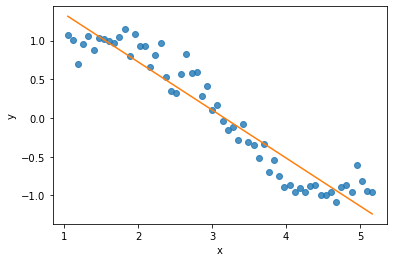

In [67]:
# Plot a straight line
fit_poly(1)

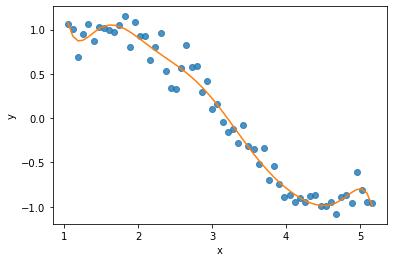

In [68]:
fit_poly(10)

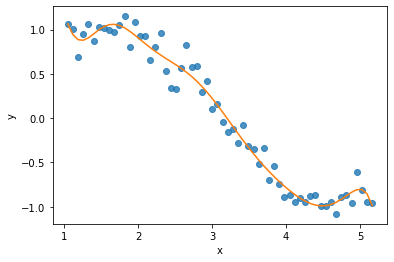

In [79]:
fit_poly(12)

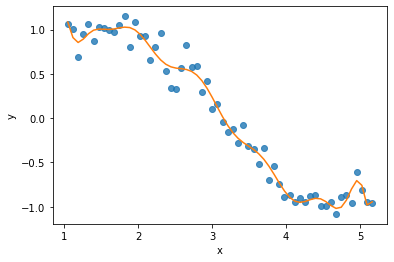

In [80]:
fit_poly(15)

### Function to calculate the RMSE - Root Mean Squared Error

The measure of quality is through using an error function (review Week 5 lectures).  In this case, this error function is the Root Mean Square Error (RMSE).  The RMSE is a measurement to see how far the 'fit' is from the actual data. 

In [71]:
def get_rmse(y, y_fit ):
    return np.sqrt(metrics.mean_squared_error(y, y_fit))

#### Split the data into training set and testing set

We use the sklearn library's function to split our datasets.

In [72]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [73]:
# Test size of 0.40 means that use 40% for testing.  Normally, we use 30%, 25% or 20%
# but we are just illustrating that it can be higher (or lower)
train_X, test_X, train_y, test_y = train_test_split(curve.x,
                                                    curve.y,
                                                    test_size = 0.30,
                                                    random_state = 100 )

#### Generating 'fit' from polynomial degree 1 from degree 16

In [74]:
rmse_df = pd.DataFrame(columns = ["degree", "rmse_train", "rmse_test"])

for i in range(1, 16):
    p = np.polyfit(train_X, train_y, deg = i)
    rmse_df.loc[i-1] = [i,
                        get_rmse(train_y, np.polyval(p, train_X)),
                        get_rmse(test_y, np.polyval(p, test_X))]

In [75]:
rmse_df

,degree,rmse_train,rmse_test
0,1.0,0.230851,0.246821
1,2.0,0.229346,0.254036
2,3.0,0.113609,0.182653
3,4.0,0.111905,0.181004
4,5.0,0.109300,0.174295
5,6.0,0.104777,0.182054
6,7.0,0.103883,0.174114
7,8.0,0.103583,0.169471
8,9.0,0.101758,0.167800
9,10.0,0.101218,0.167580


#### Plot of RMSE according to polynomial degree of 1 to 16

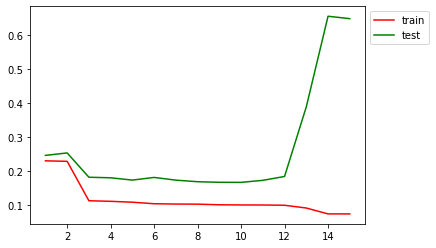

In [77]:
plt.plot(rmse_df.degree,
         rmse_df.rmse_train,
         label='train',
         color = 'r')

plt.plot(rmse_df.degree,
         rmse_df.rmse_test,
         label='test',
         color = 'g' )

# Position the legend (the name for the box on the top right)
plt.legend(bbox_to_anchor=(1, 1),
           loc=2,
           borderaxespad=0.5)


According to the graph above, the higher degree of polynomial of the line/curve, the **better** the fit of the line to the (train) data (hence lower RMSE - Root Mean Squared Error). As the degree grows, the error rate reduces until it reaches of point (at degree 12) where the 'fit' does not generalize to the test data. This is evident where the RMSE increase tramendously from degree 12 onwards while RMSE (for the train data) continues to drop below 0.1. 

It's a delicate balance between finding the best degree polynomial so that we do not end up with a model that overfits the training data (resulting in a poor RMSE for the test data).

Acknowledgement to Ms Lee Mei Sin for preparing the original activity.